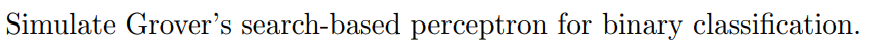

The Perceptron algorithm is a simple binary classifier that updates its weight vector
𝑤
w whenever it misclassifies a data point.

The Grover-based perceptron replaces the linear search for misclassified points with a quantum search — Grover’s algorithm — which, in theory, can find a target element (a misclassified point) in
𝑂
(
sqrt(𝑁
))
 time instead of
𝑂
(
𝑁
)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

**Generate Simple Data**

Generates n = 100 random 2D points from a standard normal distribution.

The label y is assigned based on the sign of (x1 + x2):

If x1 + x2 > 0, class is +1

Else, class is -1

This creates a simple linearly separable dataset divided by the line x1 + x2 = 0.

In [ ]:
def generate_data(n=100):
    np.random.seed(0)
    X = np.random.randn(n, 2)
    y = np.sign(X[:, 0] + X[:, 1])   # Linearly separable
    return X, y


**Sign Function**

Returns +1 if input ≥ 0, else -1.

Used for making binary predictions.

In [ ]:
def sign(x):
    return np.where(x >= 0, 1, -1)


**Classical Perceptron**

Start with weights = 0.

For each data point (X[i], y[i]):

Compute prediction: sign(X[i] · w)

If it’s wrong, update weight:

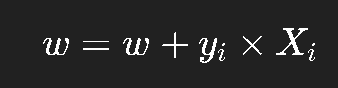

Repeat for multiple epochs (iterations).


In [ ]:
def classical_perceptron(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])
    for epoch in range(max_iter):
        for i in range(len(X)):
            if sign(np.dot(X[i], w)) != y[i]:
                w += y[i] * X[i]
    return w


**Simulated Grover Search**

In a real quantum setting, Grover’s algorithm uses amplitude amplification to find one of the indices where the condition pred ≠ y (misclassified) holds.

The theoretical advantage is that it finds a misclassified sample in O(√N) instead of checking all N samples.

In this simulation:

We find all misclassified indices (misclassified).

Then randomly choose one — simulating the effect of Grover’s search “amplifying” one of the target indices.

In [ ]:
def grover_search(w, X, y):
    preds = sign(X @ w)
    misclassified = np.where(preds != y)[0]
    if len(misclassified) == 0:
        return None
    idx = np.random.choice(misclassified)
    return idx


Start with zero weights.

Use grover_search() to find one misclassified point.

If all points are correct → stop training.

Otherwise, update weights same as perceptron rule:

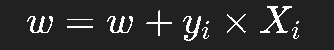

Repeat until convergence or max_iter reached.

Purpose: Mimics how a perceptron would operate if Grover’s search were used to efficiently find misclassified examples.

In [ ]:
def grover_perceptron(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])
    for epoch in range(max_iter):
        idx = grover_search(w, X, y)
        if idx is None:
            break  # All classified correctly
        w += y[idx] * X[idx]
    return w


**Running Both Algorithms**

Generates data and trains both perceptrons.


In [ ]:
X, y = generate_data(100)

w_classical = classical_perceptron(X, y)
w_grover = grover_perceptron(X, y)


**Plot Decision Boundaries**

Plots both classes in 2D.

Draws two lines (decision boundaries):

Green dashed: Classical Perceptron

Black solid: Grover-based Perceptron

Shows how both algorithms learned to separate the classes.

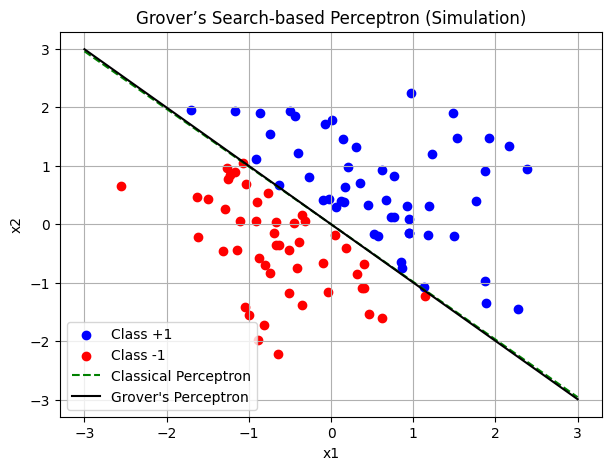

In [ ]:
plt.figure(figsize=(7,5))
plt.scatter(X[y==1,0], X[y==1,1], c='b', label='Class +1')
plt.scatter(X[y==-1,0], X[y==-1,1], c='r', label='Class -1')

x_vals = np.linspace(-3, 3, 100)
y_classical = -(w_classical[0]/w_classical[1]) * x_vals
y_grover = -(w_grover[0]/w_grover[1]) * x_vals

plt.plot(x_vals, y_classical, 'g--', label='Classical Perceptron')
plt.plot(x_vals, y_grover, 'k-', label="Grover's Perceptron")

plt.xlabel('x1')
plt.ylabel('x2')
plt.title("Grover’s Search-based Perceptron (Simulation)")
plt.legend()
plt.grid(True)
plt.show()


Computes accuracy for both models.

Typically, both achieve 100% accuracy because the dataset is linearly separable.

In [ ]:
acc_classical = np.mean(sign(X @ w_classical) == y)
acc_grover = np.mean(sign(X @ w_grover) == y)

print("Accuracy (Classical Perceptron):", acc_classical)
print("Accuracy (Grover-based Perceptron):", acc_grover)


Accuracy (Classical Perceptron): 1.0
Accuracy (Grover-based Perceptron): 1.0
